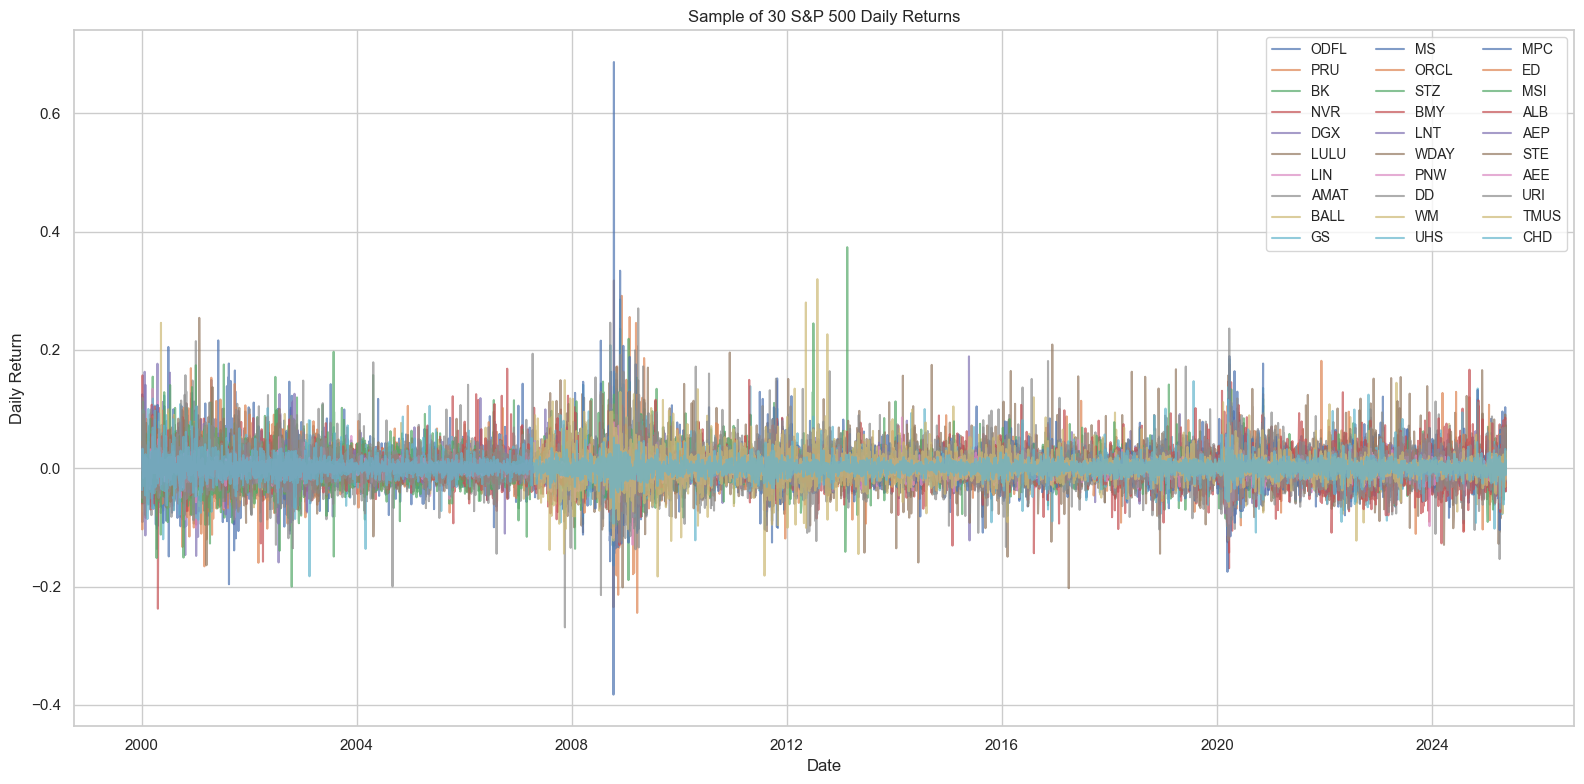

In [28]:
# 📈 Visualize 30 Raw S&P 500 Returns

import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from config import PROCESSED_STOCK_CSV

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load the raw price data
raw_prices = pd.read_csv(PROCESSED_STOCK_CSV, index_col=0, parse_dates=True)

# Compute daily returns
raw_returns = raw_prices.pct_change().dropna(how='all')

# Sample 30 tickers randomly
sampled_tickers = random.sample(list(raw_returns.columns), 30)

# Plot
plt.figure(figsize=(16, 8))
for ticker in sampled_tickers:
    plt.plot(raw_returns.index, raw_returns[ticker], label=ticker, alpha=0.7)

plt.title("Sample of 30 S&P 500 Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc="upper right", fontsize="small", ncol=3)
plt.tight_layout()
plt.show()


❌ Total dropped tickers: 125

Top 10 dropped tickers by missing percentage:


,Ticker,Missing %
105,SW,96.61
52,GEV,95.56
103,SOLV,95.56
117,VLTO,93.65
71,KVUE,92.01
51,GEHC,90.52
18,CEG,86.93
24,COIN,83.89
41,EXE,83.22
1,ABNB,82.57


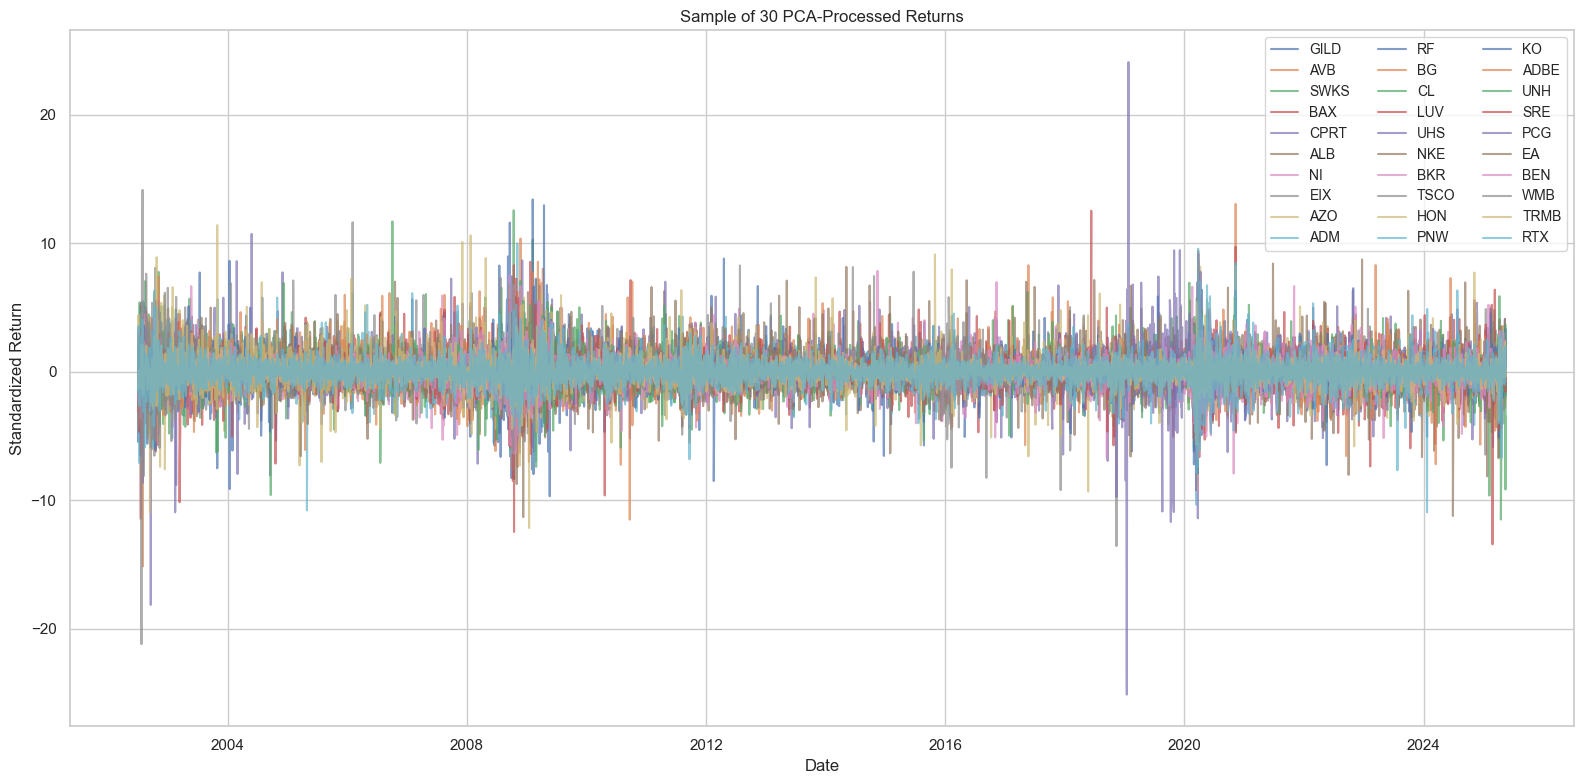

In [32]:
# 📊 Visualize 30 Processed PCA Returns and Dropped Tickers

from config import PROCESSED_PCA_RETURNS_CSV
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load data
raw_prices = pd.read_csv(PROCESSED_STOCK_CSV, index_col=0, parse_dates=True)
raw_returns = raw_prices.pct_change().dropna(how='all')

pca_returns = pd.read_csv(PROCESSED_PCA_RETURNS_CSV, index_col=0, parse_dates=True)

# Compare tickers
raw_tickers = set(raw_returns.columns)
processed_tickers = set(pca_returns.columns)
dropped_tickers = sorted(list(raw_tickers - processed_tickers))

# Compute missingness for dropped tickers
drop_stats = []
for ticker in dropped_tickers:
    missing_pct = raw_returns[ticker].isna().mean() * 100
    drop_stats.append((ticker, round(missing_pct, 2)))

drop_df = pd.DataFrame(drop_stats, columns=["Ticker", "Missing %"]).sort_values(by="Missing %", ascending=False)

# Print summary
print(f"❌ Total dropped tickers: {len(dropped_tickers)}")
print("\nTop 10 dropped tickers by missing percentage:")
display(drop_df.head(10))

# Plot 30 sample PCA-processed returns
sampled = random.sample(list(pca_returns.columns), 30)
plt.figure(figsize=(16, 8))
for ticker in sampled:
    plt.plot(pca_returns.index, pca_returns[ticker], label=ticker, alpha=0.7)

plt.title("Sample of 30 PCA-Processed Returns")
plt.xlabel("Date")
plt.ylabel("Standardized Return")
plt.legend(loc="upper right", fontsize="small", ncol=3)
plt.tight_layout()
plt.show()
